#### **Análisis sobre la matriculación/inscripción de los estudiantes**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('../data_raw/dataset.csv')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,5,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,10,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,5,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


**Extraer características**

In [3]:
enrollment_features = df.loc[df['Target']=='Dropout',['Application mode','Application order','Course','Daytime/evening attendance',
                                                      'Previous qualification']]

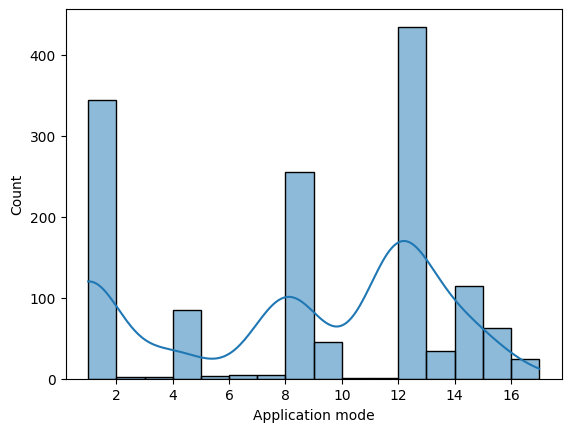

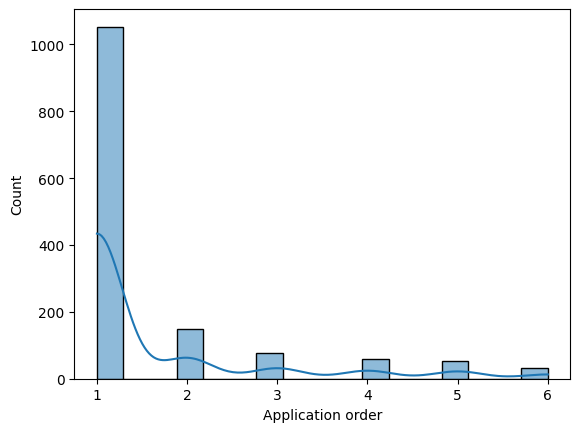

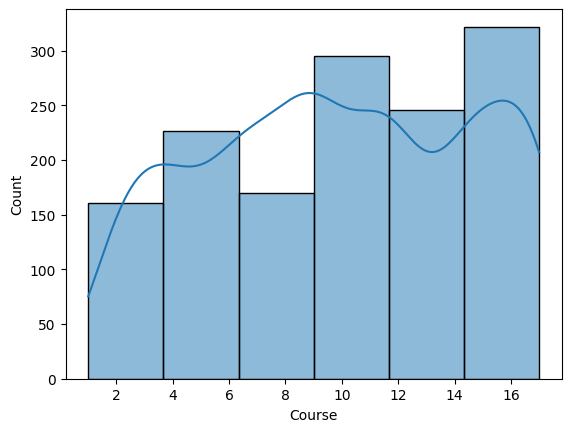

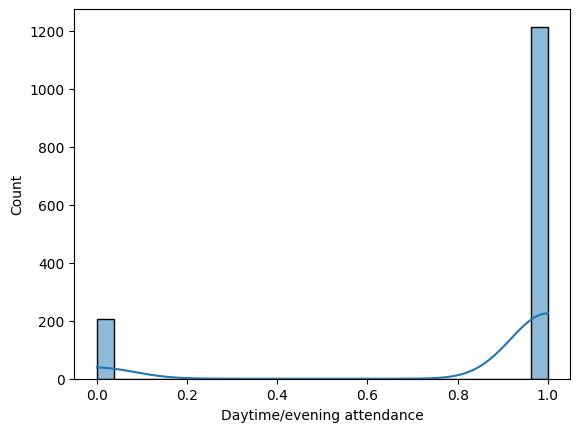

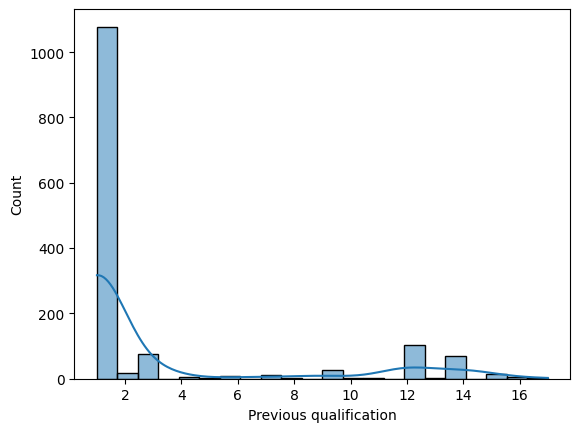

In [28]:
for i in enrollment_features.columns:
    sns.histplot(data=enrollment_features, x=i, kde=True, bins=len(i))
    plt.show()

Observaciones
- La mayoria de los estudiantes que abandonaron se inscribieron con más de 23 años. Seguido de la 1º fase contingente general y 2º fase contingente general.
- La gran mayoria aplicó/matriculó como primera prioridad.
- Sobre estos estudiantes, observamos que la mayoria estudian educación básica.
- Asisten durante el día (turno diurno).
- La cualificación anterior de los estudiantes es la educación secundaria.

**Correlaciones**

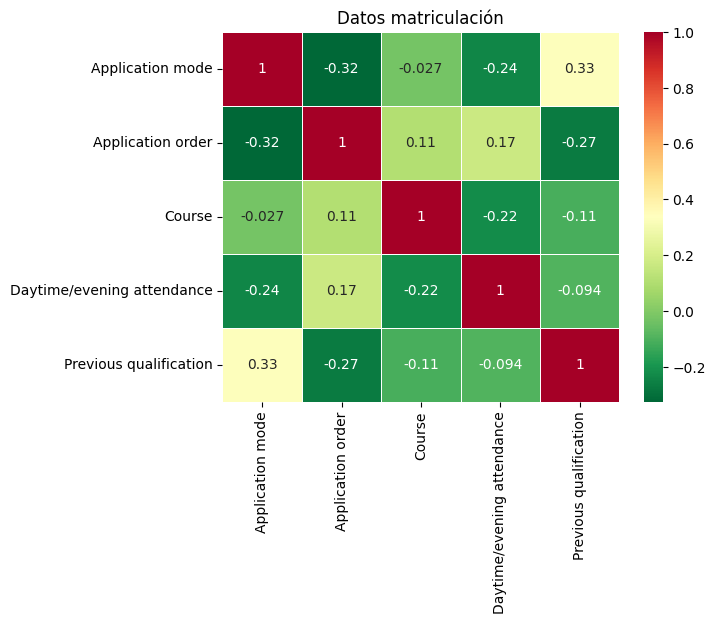

In [30]:
# Mapa de correlaciones entre caractersticas
enrollment_corr = enrollment_features.corr(method='spearman')
#mask = np.triu(np.ones_like(enrollment_corr, dtype=bool))
sns.heatmap(data=enrollment_corr,cmap='RdYlGn_r', annot=True, linewidths=.5)
plt.title('Datos matriculación')
plt.show()

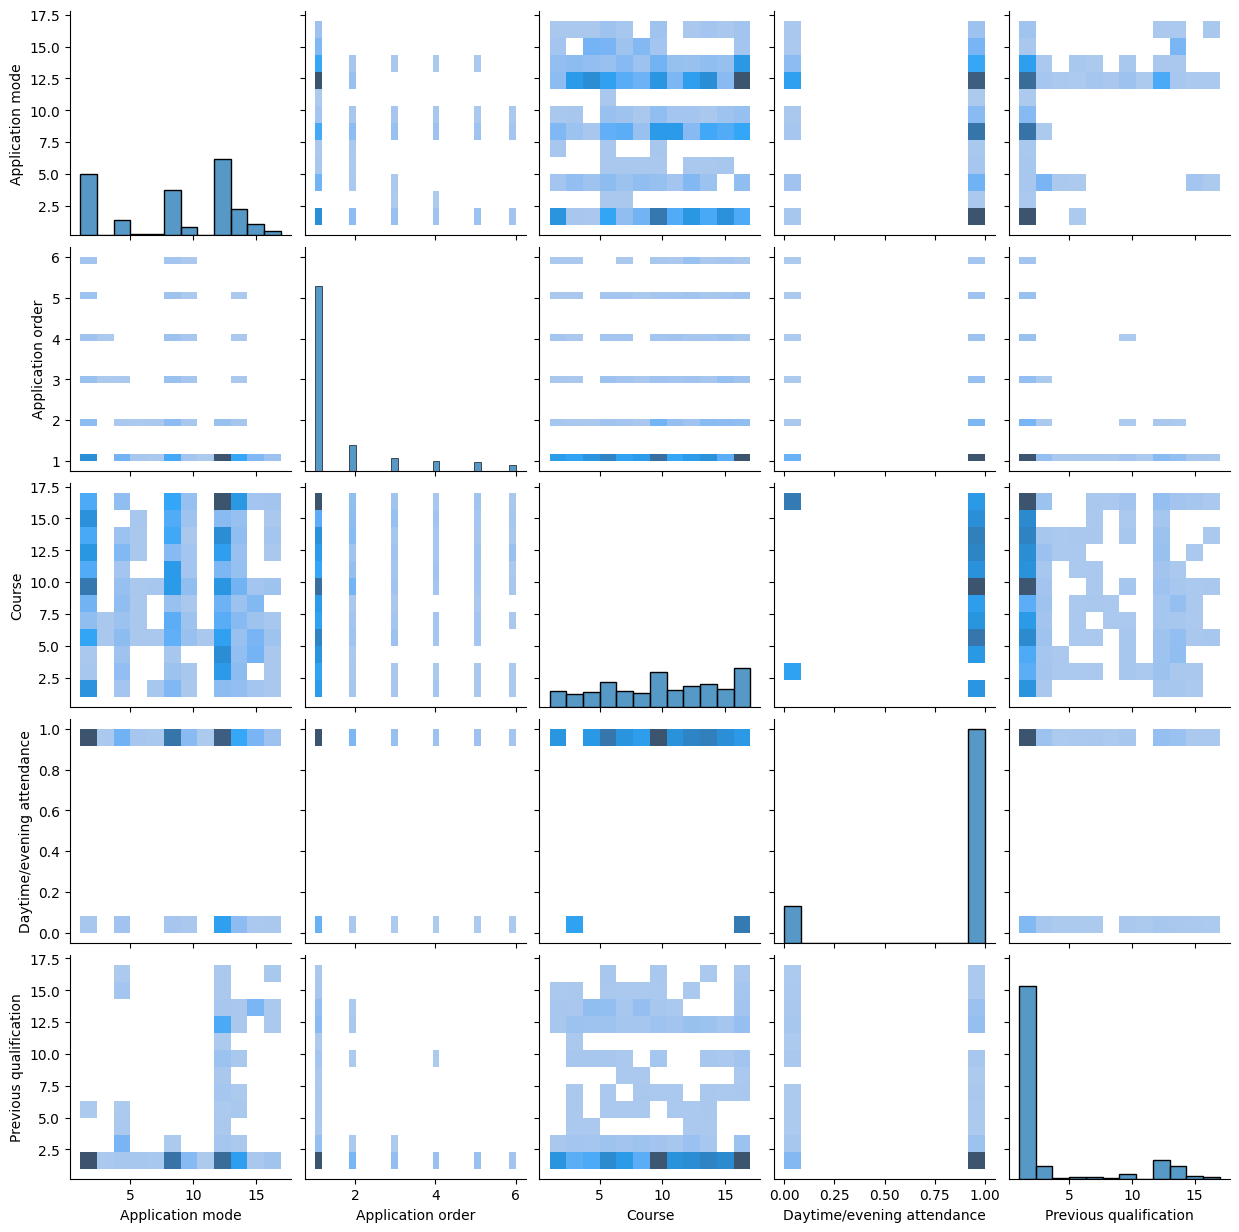

In [46]:
sns.pairplot(enrollment_features, kind='hist')

<Axes: xlabel='Application mode', ylabel='Previous qualification'>

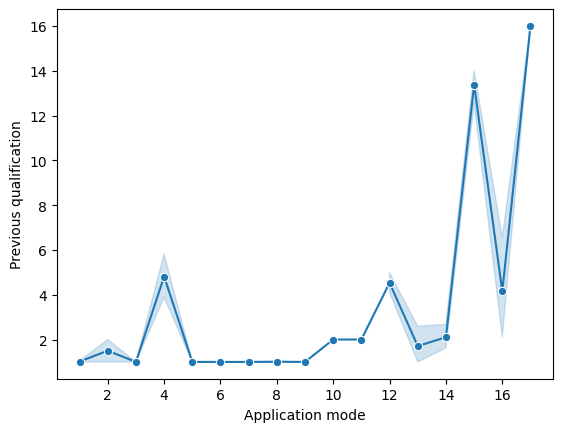

In [8]:
sns.lineplot(data=enrollment_features, x='Application mode',y='Previous qualification', marker='o')

Observamos como en lo referente al modo de inscribirse encontramos una relacion positiva con la cualificación previa del estudiante. Tiene sentido ya que diferentes titulos ayudan a acceder mediante diferentes vías (inscripciones) a los cursos/formaciones requeridas.

<Axes: xlabel='Application mode', ylabel='Application order'>

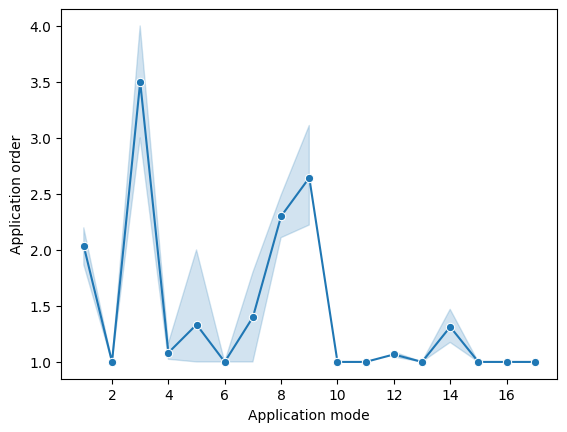

In [9]:
sns.lineplot(data=enrollment_features, x='Application mode',y='Application order',marker='o')

Incripciones mas generales (1º fase general, 2º fase, etc) tienden a presentar mas recurrentemente un mayor numero de ordenes (osea, no priorizar como la primera inscripcion), o sencillamente los alumnos no son escogidos previamente y necesitan de mas adjudicaturas.
Así mismo, las inscripciones mas especializadas, las ultimas del grafico (mas de 23 años, cambio de curso, titulares de especializaciones, etc) tienden a presentarse y ser aceptados como primera prioridad.

<Axes: xlabel='Application order', ylabel='Previous qualification'>

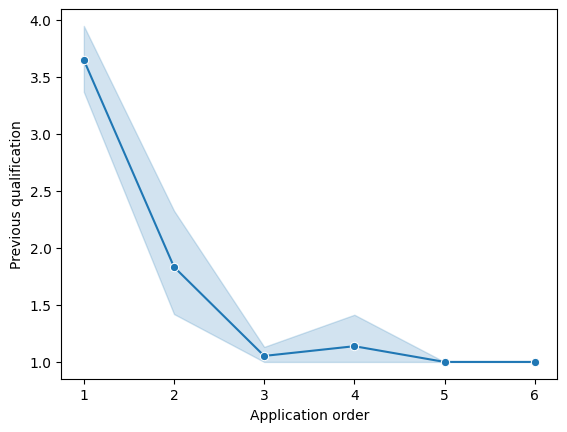

In [11]:
sns.lineplot(data=enrollment_features, x='Application order',y='Previous qualification',marker='o')

Los estudiantes con educaciones previas al ingreso de un mayor nivel (grados,masters,etc) tienden a presentar su matriculación como primera opción y ser aceptados.
En cambio, los de menor cualificación, necesitan de más intentos (órdenes) para ser aceptados.